## Линейная регрессия в машинном обучение

**Статическая регрессия** - это скальтель, а **машинное обучение** - это бензопила.

Когда вы имеете дело с огромным массивом данных и переменных, вы не сможете обработать все это скальпелем. Приходится прибегать к бензопиле, и хотя при этом теряется объяснимость и точность, решение, по крайней мере, можно масштабировать, чтобы делать более широкие прогнозы на большем количестве данных.

Для борьбы с переобучением - было придумано делить набор данных на **обучающую** и **тестовую** выборку. Обычно в соотношение 2/3 к 1/3.

**Обучающая выборка** используется для того, чтобы подогнать линейную регрессию, а **тестовая** - чтобы оценить эффективность регрессии на данных, с которыми она раньше не сталкивалась.

In [7]:
# Разделение набора данных на обучающую и тестовую выборки для линейной регрессии
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://bit.ly/3cIH97A", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("r² = %.3f %.4f" % (result, result))

r² = 0.993 0.9930


### Обучение - это подгонка регрессии

### Коэффициент детерминации (r²)

**Коэффициент детерминации (r²),** чтобы вычислить его, мы сравнимаем прогнозы на тестовой выборке с прямой регрессии, которая подогнана на обучающей выборке.

**Смысл такой же:** чем ближе r² к 1, тем сильнее оказывается регрессионнная корреляция даже на тестовой выборке, а если r² близок к 0, это значит, что регрессия плохо работает на тестовых данных.

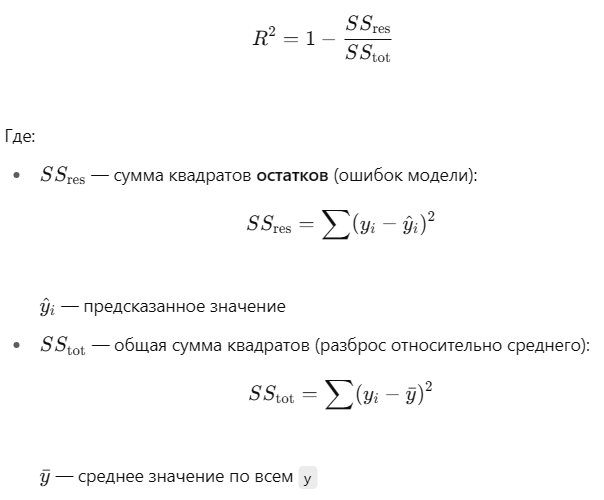

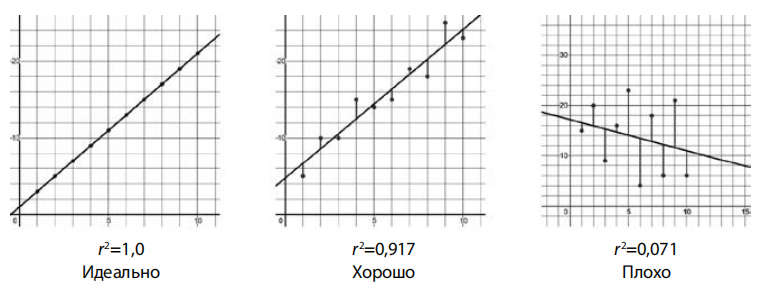

#### Интерпретация

r² = 1 -> идеальная модель: предсказания точно совпадают с наблюдениями.

r² = 0 -> модель **ничем не лучше**, чем просто среднее значение.

r² < 0 -> модель хуже, чем брать среднее (например, наклон не в ту сторону).

### Перекрестная валидация

Можно также обучать и тестировать модель трижды, каждый раз назначая тестовой выборкой новую треть набора данных, а обучающей - оставшиеся две трети. Это называется **перекрестной валидацией** и зачастую считается эталонным методом валидации.

In [1]:
# Трехкратная перекрестная валидация для линейной регрессии

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv("https://bit.ly/3cIH97A", delimiter=",")

# Извлекаем входные переменные (все строки и все столбцы, кроме последнего столбца) 
X = df.values[:, :-1]

# Извлекаем столбец с выходной переменной (все строки, только последний столбец)
Y = df.values[:, -1]

# Простая линейная регрессия
kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("MSE: mean = %.3f (stdev = %.3f)" % (results.mean(), results.std()))

[0.99337354 0.99345032 0.99251425]
MSE: mean = 0.993 (stdev = 0.000)
